In [9]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision.datasets as datasets
from torchvision import transforms as tvt
from torch.utils.data import DataLoader

In [161]:
def apply_color(images, labels, biased=False):
    colors = np.array(
        [[230, 25, 75],
        [245, 130, 48],
        [255, 225, 25],
        [250, 190, 190],
        [0, 130, 200],
        [230, 190, 255],
        [240, 50, 230],
        [70, 240, 240],
        [60, 180, 75],
        [170, 110, 40]])
    
    if biased:
        # assign a random probability to each color, for each class
        # each class has a predilection to one color, with a smaller probability of assuming others
        #bias = np.random.randint(0,100,(10,10)) / 100
        bias = np.eye(10) + np.roll(np.eye(10), 1, axis=0) + np.roll(np.eye(10), 2, axis=0) + 0.01
    else:
        # for test samples each color should be equally likely
        bias = np.ones((10,10))
        
    # make sure bias sums to 1 across its rows
    bias = bias / bias.sum(axis=1,keepdims=1)
    
    color_labels = np.zeros(labels.shape, dtype = np.int64)
    k = 0
    for im, lb in zip(images, labels):
        # get the color probabilities for this class
        color_probs = bias[lb]
        color_index = np.random.choice(np.arange(10), p=color_probs)
        color_labels[k] = color_index
        k = k + 1
        color = colors[color_index]

        for i in range(3):
            im[i,:,:] *= color[i] / 255

    color_labels = torch.tensor(color_labels)
    return images, color_labels
        

In [170]:
# create the data loader
transform = tvt.Compose([
    # convert from PIL to tensor
    tvt.ToTensor(), 
    # convert from gray to rgb
#     tvt.Lambda(lambda x: x.repeat(3, 1, 1) )
])
mnist = datasets.CIFAR10(root='E:/data/datasets/cifar10', train=True, download=True, transform=transform)
loader = DataLoader(mnist, batch_size=100, shuffle=False)

Files already downloaded and verified


[[6. 3. 3. 5. 0. 2. 1. 9. 9. 9. 2. 8. 3. 0. 2. 4. 5. 3. 5. 7.]
 [6. 5. 4. 6. 9. 0. 4. 4. 9. 8. 3. 8. 4. 4. 4. 9. 4. 7. 1. 9.]
 [5. 0. 4. 7. 1. 7. 4. 5. 6. 2. 3. 9. 4. 8. 8. 7. 7. 6. 7. 4.]
 [4. 1. 0. 2. 3. 0. 0. 0. 5. 8. 0. 5. 6. 3. 0. 7. 5. 2. 1. 0.]
 [5. 5. 3. 3. 7. 2. 8. 2. 2. 6. 4. 5. 1. 9. 0. 5. 1. 4. 6. 9.]
 [8. 7. 5. 1. 3. 4. 9. 1. 5. 7. 4. 3. 8. 7. 1. 4. 5. 8. 5. 9.]
 [4. 7. 9. 6. 0. 3. 9. 1. 4. 7. 2. 4. 8. 9. 4. 8. 3. 1. 1. 6.]
 [4. 8. 8. 6. 7. 0. 3. 9. 1. 6. 3. 1. 4. 1. 3. 0. 5. 2. 4. 0.]
 [6. 4. 0. 5. 9. 0. 6. 7. 0. 8. 0. 5. 6. 2. 1. 6. 4. 8. 0. 1.]
 [7. 3. 0. 7. 4. 3. 2. 9. 8. 7. 9. 9. 2. 2. 8. 9. 2. 0. 5. 8.]]


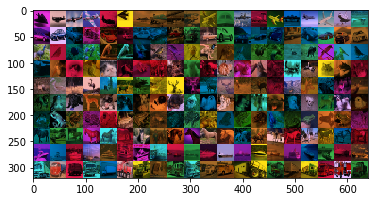

In [173]:
# create a 10x20 collage of unbiased training samples
colormat = np.zeros((10,20))
# collage = np.zeros((280,560,3))
collage = np.zeros((320,640,3))
loader_iter = iter(loader)
for i in range(20):
    images, labels = next(loader_iter) 
    images, colors = apply_color(images, labels, False)
    for j in range(10):
        ix = np.where(labels == j)[0][0]
        im = images[ix]
        im = np.swapaxes(im, 0, 1)
        im = np.swapaxes(im, 1, 2)
        collage[j*32:(j+1)*32, i*32:(i+1)*32, :] = im
        colormat[j,i] = int(colors[ix])
plt.imshow(collage)
print(colormat)

[[8. 0. 0. 9. 0. 9. 9. 9. 0. 1. 0. 8. 9. 0. 8. 0. 9. 8. 0. 0.]
 [0. 1. 1. 1. 9. 1. 0. 9. 9. 0. 1. 1. 1. 0. 9. 0. 9. 0. 9. 1.]
 [2. 1. 2. 2. 0. 1. 2. 0. 2. 1. 2. 0. 2. 2. 1. 0. 2. 1. 0. 2.]
 [1. 3. 1. 2. 2. 1. 2. 3. 2. 2. 2. 3. 3. 1. 1. 1. 2. 2. 3. 6.]
 [2. 2. 2. 3. 4. 3. 2. 3. 3. 2. 2. 3. 2. 2. 2. 3. 2. 2. 2. 4.]
 [3. 5. 3. 3. 5. 3. 5. 5. 3. 4. 4. 3. 4. 5. 3. 5. 3. 5. 3. 4.]
 [6. 6. 5. 6. 4. 5. 6. 6. 6. 4. 4. 5. 6. 5. 5. 6. 5. 6. 5. 5.]
 [7. 5. 7. 5. 7. 5. 6. 6. 7. 5. 6. 5. 5. 6. 6. 5. 7. 5. 5. 7.]
 [7. 6. 7. 7. 7. 8. 6. 6. 7. 7. 8. 7. 6. 6. 7. 8. 8. 6. 7. 6.]
 [9. 8. 8. 8. 9. 7. 9. 9. 8. 7. 8. 7. 7. 9. 9. 9. 7. 7. 9. 7.]]


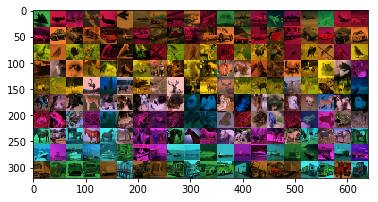

In [174]:
# create a 10x20 collage of biased training samples
colormat = np.zeros((10,20))
# collage = np.zeros((280,560,3))
collage = np.zeros((320,640,3))
loader_iter = iter(loader)
for i in range(20):
    images, labels = next(loader_iter) 
    images, colors = apply_color(images, labels, True)
    for j in range(10):
        ix = np.where(labels == j)[0][0]
        im = images[ix]
        im = np.swapaxes(im, 0, 1)
        im = np.swapaxes(im, 1, 2)
        collage[j*32:(j+1)*32, i*32:(i+1)*32, :] = im
        colormat[j,i] = int(colors[ix])
plt.imshow(collage)
print(colormat)